### Healthcare: Predicting Heart Disease Risk
**Background**:

Heart disease is one of the leading causes of death globally.
Early prediction using clinical and lifestyle indicators can help prevent severe outcomes.
This analysis explores a heart disease dataset to uncover key risk factors
 and build a machine learning model that predicts whether a patient is at risk of heart disease.

**Objective**:

Perform Exploratory Data Analysis (EDA) to find key factors influencing heart disease.
Build and evaluate a classification model to predict heart disease risk based on non-invasive features such as:
* Age
* Cholesterol level
* Resting blood pressure
* Maximum heart rate achieved
* Chest pain type

**Dataset**:
Kaggle: Heart Disease Dataset

**Note**: The dataset originally had 723 duplicate rows, which were removed to ensure data quality.

### Step 1: Data Cleaning

#### Import Libraries

In [1]:
# These are the tools we'll use for our analysis

import pandas as pd  # For handling data (like Excel but more powerful)
import numpy as np  # For mathematical operations
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns  # For beautiful statistical plots

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report,
                             roc_auc_score, roc_curve)
from xgboost import XGBClassifier

# Ignore warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set visualization style
sns.set_style("whitegrid")

#### Load the Dataset and initial Data Inspection

In [3]:
df = pd.read_csv(r"C:\Users\CYBER SHAY\Downloads\Techcrush-Capstone-DataDynamos\Data\heart.csv") # Load the heart disease dataset

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


#### Basic Data Exploration

In [4]:
df.shape

(1025, 14)

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
print(df.describe())

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

In [7]:
print ("Missing Values:\n", df.isna().sum())

Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


### Observation:
* Dataset contains 1025 rows and 14 columns.

* Features include **age, sex, cp (chest pain type),
chol (cholesterol), thalach (max heart rate)**, etc

* Target column : **target**(1 =heart disease, 0= no
  heart disease).

#### Handle Duplicates

In [8]:
duplicates = df.duplicated ().sum()
print ("Number of Duplicates rows:", duplicates)

df = df.drop_duplicates()
df.shape

Number of Duplicates rows: 723


(302, 14)

#### Insight:

* There were 723 duplicated rows, 
which were removed to ensure data integrity.

* After removing duplicates, the dataset contained 302 rows and 14 columns.
Features include both 
 
 **categorical** (e.g., chest pain type, gender, ECG results) 

**numerical** (e.g., age, cholesterol) variables.

* Separating these helps ensure correct preprocessing (scaling numerical values, encoding categorical ones).

In [9]:
print ("Columns:", df.columns.tolist())

Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [10]:
df.to_csv("cleaned_heart_data.csv", index=False)

### Step 2 : Exploratory Data Analysis(EDA) - Plots,Visualizations and Insight

#### Distribution of Target Variable

Dataset is BALANCED - roughly equal patients with and without disease.
This is good! Our models won't be biased toward one class.


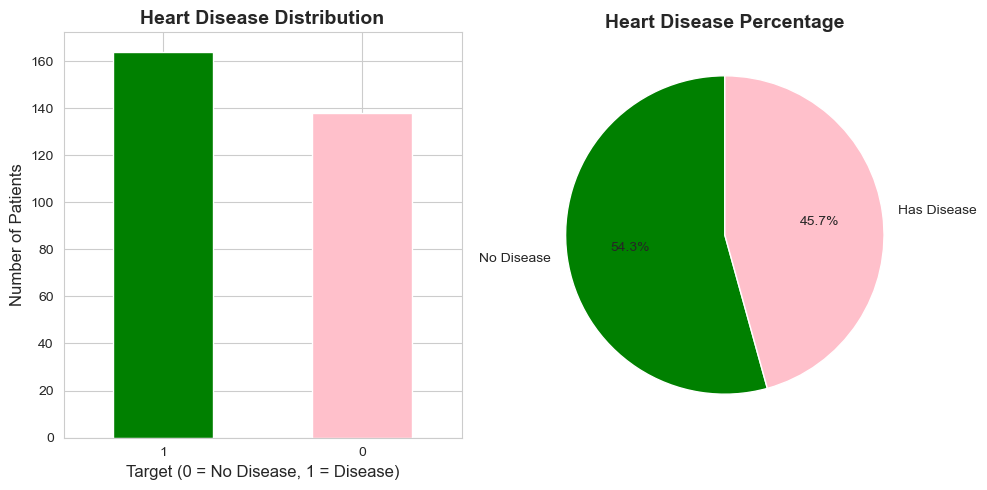

In [11]:
# Count of patients with and without heart disease
target_counts = df['target'].value_counts()
target_percentage = df['target'].value_counts(normalize=True) * 100

if abs(target_percentage[0] - target_percentage[1]) < 10:
    print("Dataset is BALANCED - roughly equal patients with and without disease.")
    print("This is good! Our models won't be biased toward one class.")
else:
    print("Dataset is IMBALANCED - consider this when evaluating models.")

# Visualize target distribution
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
target_counts.plot(kind='bar', color=['green', 'pink'])
plt.title('Heart Disease Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Target (0 = No Disease, 1 = Disease)', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
plt.pie(target_counts, labels=['No Disease', 'Has Disease'], 
        autopct='%1.1f%%', colors=['green', 'pink'], startangle=90)
plt.title('Heart Disease Percentage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

#### Insight:
*  The dataset is **slightly balanced**, with more patients having heart disease than not.  
>Patients **WITHOUT** heart disease (0): 138 `(45.7%)`  
>Patients **WITH** heart disease (1): 164 `(54.3%)`


#### Age Distribution by Target

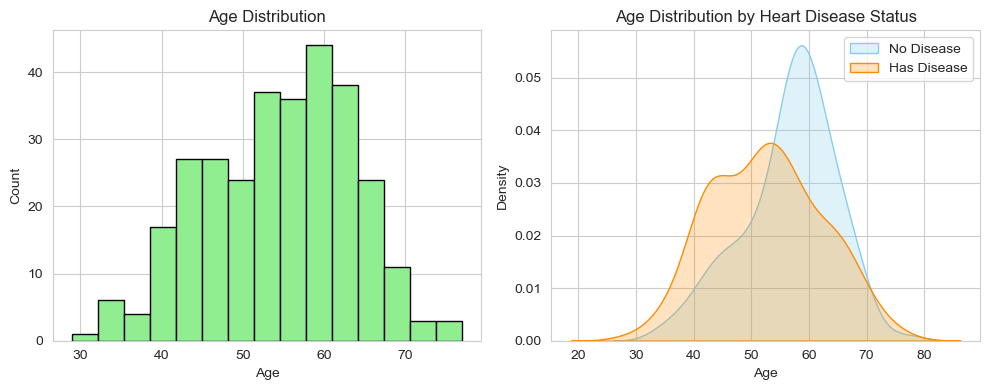

In [12]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(df['age'], bins=15, color='lightgreen', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.kdeplot(df[df['target']==0]['age'], fill=True, color='skyblue', label='No Disease')
sns.kdeplot(df[df['target']==1]['age'], fill=True, color='darkorange', label='Has Disease')
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

### Observation:
* Heart disease cases are more common among **middle-aged adults (45–65 years)**,

   showing that age plays a significant role in cardiovascular risk.

#### Chest Pain Type vs Heart Disease

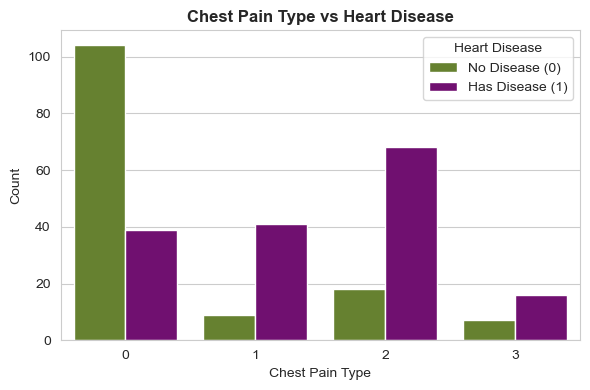

In [13]:
# Check if the 'cp' column exists in your dataset

if 'cp' in df.columns:
    plt.figure(figsize=(6,4))  # smaller plot
    sns.countplot(x='cp', hue='target', data=df, palette=['olivedrab', 'purple'])
    plt.title('Chest Pain Type vs Heart Disease', fontsize=12, fontweight='bold')
    plt.xlabel('Chest Pain Type')
    plt.ylabel('Count')
    plt.legend(title='Heart Disease', labels=['No Disease (0)', 'Has Disease (1)'])
    plt.tight_layout()
    plt.show()


### Insights:

*  Patients with **chest pain type 0** (Typical Angina) are less likely to have heart disease.
  
* Those with **type 1** (Atypical Angina) show a moderate likelihood.

* Those with **type 2** (Non-anginal pain) and 3 (Asymptomatic) show a higher rate of heart disease,

suggesting that not all chest pain feels severe but can still indicate heart problems.  

* This highlights that chest pain type is a strong predictor of heart disease presence.

### Cholesterol vs Heart Disease

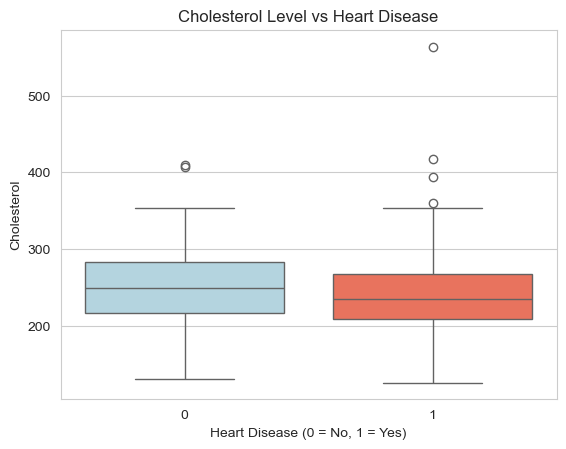

In [14]:
sns.boxplot(x='target', y='chol', data=df, palette=['lightblue', 'tomato'])
plt.title("Cholesterol Level vs Heart Disease")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Cholesterol")
plt.show()


### Resting Blood Pressure vs Heart Disease

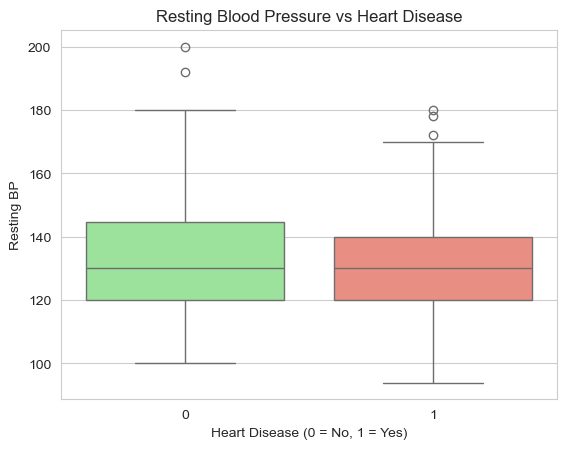

In [15]:
sns.boxplot(x='target', y='trestbps', data=df, palette=['lightgreen', 'salmon'])
plt.title("Resting Blood Pressure vs Heart Disease")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Resting BP")
plt.show()


### Maximum Heart Rate vs Heart Disease

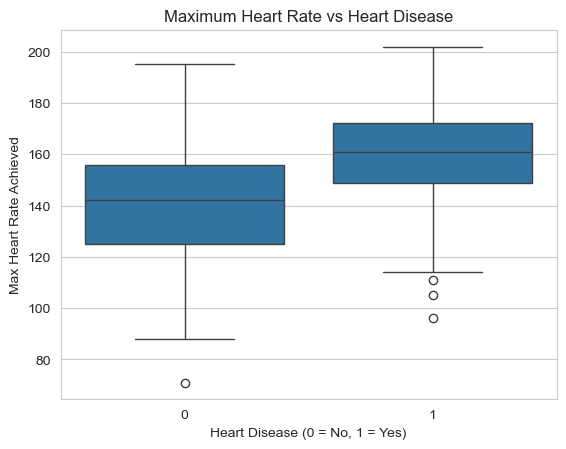

In [16]:
sns.boxplot(x='target', y='thalach', data=df)
plt.title("Maximum Heart Rate vs Heart Disease")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Max Heart Rate Achieved")
plt.show()


#### Insight:
* Those with higher max rates (thalach)

  are less likely to have heart disease

#### Correlation Heatmap (Numerical Features)

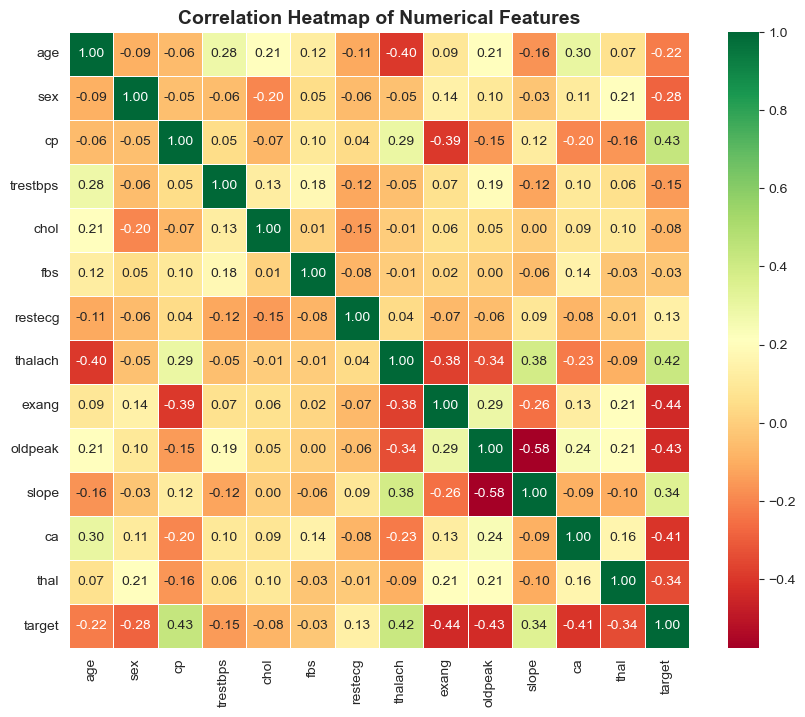

In [17]:
# Select only numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="RdYlGn", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=14, fontweight='bold')
plt.show()

### Key Insights: 

* Cp(chest pain type), thalach (maximum heart rate) shows a **positive correlation** with heart disease, higher values tend to indicate greater risk.

* old peak (ST depression) shows a **negative correlation**, meaning higher values may indicate severe heart issues.

* Cholesterol has a **weak correlation**, meaning it may not significantly influence heart disease on its own.

### Step 3 : Data Preprocessing

#### Separate Categorical and Numerical Columns

In [18]:
# Define your target column
target_col = 'target'

# Separate categorical and numerical columns
categorical_cols = []
numerical_cols = []

for col in df.columns:
    if col == target_col:
        continue
    if df[col].dtype == 'object' or df[col].nunique() <= 6:
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)

# Confirm separation
print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)


Numerical columns: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
Categorical columns: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


#### Why This Matters
Categorical variables contain discrete values 
(like chest pain type or gender),
 while numerical ones contain continuous
 measurements (like cholesterol or age).

Models interpret these differently:

* Numerical features need scaling 

  (so large values don’t dominate smaller ones).
* Categorical features need encoding
  (so models can read them as numbers).

#### Scaling and Encoding(preprocessing pipeline)

In [19]:
# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),      # Scale numeric columns
        ('cat', OneHotEncoder(drop='first'), categorical_cols)  # Encode categorical columns
    ])

# Split data
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine preprocessor and model into a pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


### Train/Test Split

#### Fit the Model

In [20]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Model training complete!")
print("Sample predictions:", y_pred[:10])


Model training complete!
Sample predictions: [1 0 0 0 1 0 0 1 1 1]


### Step 4 : Model Evaluation

#### Evaluate Model Performance

In [21]:
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7377049180327869
Confusion Matrix:
 [[21 11]
 [ 5 24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.66      0.72        32
           1       0.69      0.83      0.75        29

    accuracy                           0.74        61
   macro avg       0.75      0.74      0.74        61
weighted avg       0.75      0.74      0.74        61



### Insights: 

* The model correctly identified most patients with heart disease (**24 true positives**).  
* A few patients were wrongly predicted as healthy (**5 false negatives**) — this is risky in real life, as those people might not get treatment early.  
* The model also mistakenly flagged 11 healthy patients as having the disease (**false positives**).   
* Overall, the model’s accuracy 74% shows the model performs well but could still be improved for higher reliability, especially in identifying true disease cases.

### Logistic Regression Model

In [22]:
# Create pipeline (preprocessing + model)
logreg_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Train the model
logreg_model.fit(X_train, y_train)

# Predict on test set
y_pred_log = logreg_model.predict(X_test)

# Evaluate performance
log_accuracy = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {log_accuracy:.2f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.79

Confusion Matrix:
[[24  8]
 [ 5 24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        32
           1       0.75      0.83      0.79        29

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



### Insight:

* The Logistic Regression model achieved an accuracy of 79%, which is higher than the Random Forest’s 74%.
 This means the model does a better job at distinguishing between patients with and without heart disease.

However, a few misclassifications still occur,it occasionally predicts no disease when one exists (false negatives).

### XGBoost Model

In [23]:
# Train the model
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate model performance
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.8032786885245902

Confusion Matrix:
 [[24  8]
 [ 4 25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.75      0.80        32
           1       0.76      0.86      0.81        29

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61



### Insights:

* The XGBoost model achieved strong accuracy.   
* It can detect both “disease” and “no disease” cases well.   
* It performs slightly better than Random Forest, showing it’s good at handling complex patterns in the data.

### Confusion Matrix Visualization

#### Visualize Confusion Matrix

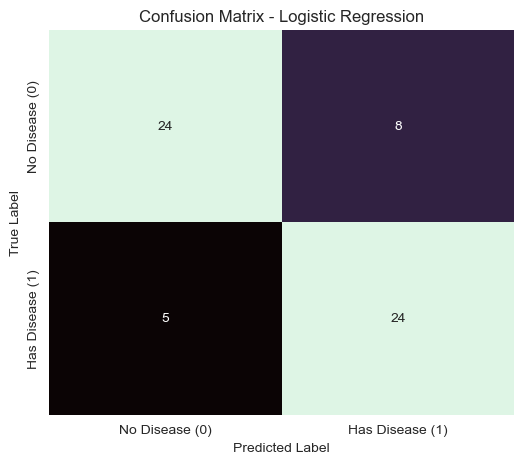

In [24]:
cm_log = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='mako', cbar=False,
            xticklabels=['No Disease (0)', 'Has Disease (1)'],
            yticklabels=['No Disease (0)', 'Has Disease (1)'])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


### ROC Curve & AUC Score

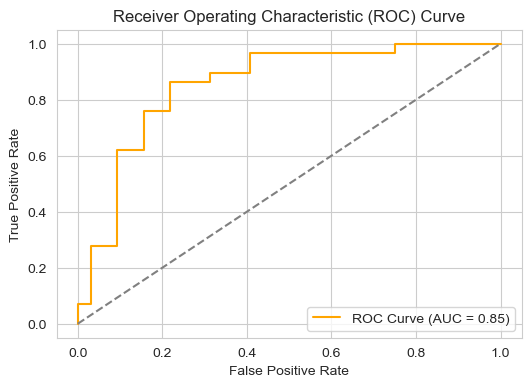

In [25]:
# ROC Curve for XGBoost Model

y_probs = xgb_model.predict_proba(X_test)[:, 1]  # Probability of class 1
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})", color='orange')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


### Interpretation
* The ROC curve visualizes model performance by

plotting the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)**.

* A **higher AUC value (≥ 0.85)** indicates a strong

ability to distinguish between heart disease and non-disease cases.

### Model Comparison & Selection

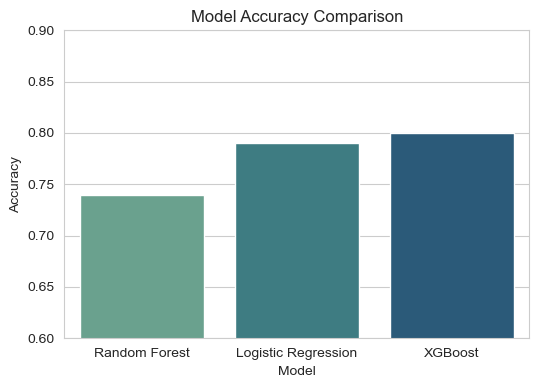

In [26]:
# Compare model accuracies
models = ['Random Forest', 'Logistic Regression', 'XGBoost']
accuracies = [0.74, 0.79, 0.80]

comparison_df = pd.DataFrame({'Model': models, 'Accuracy': accuracies})

# Visualize
plt.figure(figsize=(6,4))
sns.barplot(x='Model', y='Accuracy', data=comparison_df, palette='crest')
plt.title('Model Accuracy Comparison')
plt.ylim(0.6, 0.9)
plt.show()


### Insights:

- XGBoost achieved the highest accuracy (80%), showing it predicts heart disease most reliably.  
- Logistic Regression performed slightly lower but still strong.  
- Random Forest gave a decent baseline performance.  
- Therefore, XGBoost is selected as the final model for this project.

### Model Interpretation : Feature Importance
This helps identify which features (columns) most influenced the model’s predictions about heart disease.

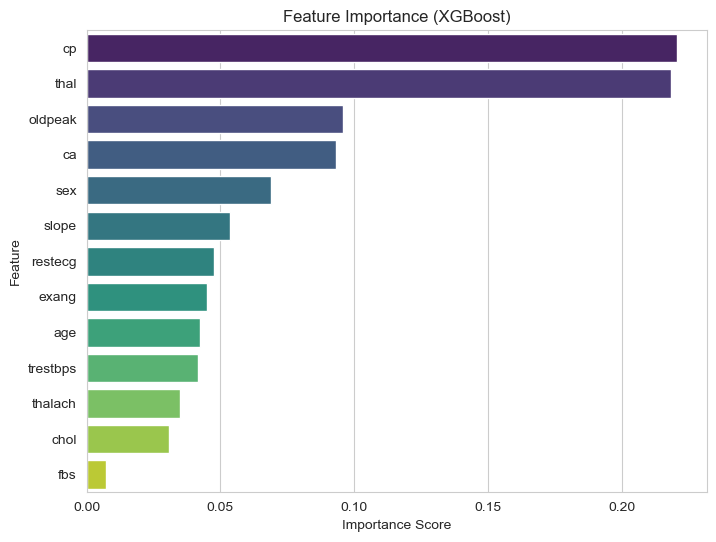

In [27]:
# Get feature importances from the XGBoost model
importances = xgb_model.feature_importances_

# Match importance scores to feature names
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualize the top important features
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance (XGBoost)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


### Insight:

Top contributors include:

* cp (chest pain type)
* thalach (max heart rate)
* oldpeak (ST depression)
* ca(number of major vessels)
* age

### Summary:

Key Insights:

* Features like Chest pain type(cp), maximum heart rate (thalach), and ST
depression have the highest importance, meaning the play the biggest role in predicting heart disease.

* Age also plays a significant role, middle-aged
individuals shows a higher risk.

* Features with lower importance like Cholesterol levels have **less effect on the model
prediction**, which explain why the model predicts certain patients as having heart 
disease.

### Recommendations:

1. **Routine Screening**: Focus preventive health program on
patients aged **45-65 years**, especially those showing abnormal chest pain symptoms.

2. **Monitoring**: Encourage physical and regular monitoring of heart rate
and ST depression (ECG results) for at-risk patients.

3. **Data Quality**: Remove and avoid duplicates in medical
records.Include additional lifestyle
factors (e.g., smoking, BMI, exercise) for more
accurate predictions.

4. **Model Enhancement**: Future versions could use more advanced
algorithms (e.g XGBoost, Logistic Regression with cross-validation) for comparative analysis